In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import numpy as np

###  Setup Logging

In [2]:
# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger()

### Load the data

In [3]:
train = pd.read_csv('/home/ayalk94/Documents/GitHub/Forecasting-Sales-for-Rossmann-Pharmaceuticals--A-Machine-Learning-Approach/data/rossmann-store-sales/train.csv')
test = pd.read_csv('/home/ayalk94/Documents/GitHub/Forecasting-Sales-for-Rossmann-Pharmaceuticals--A-Machine-Learning-Approach/data/rossmann-store-sales/test.csv')

/tmp/ipykernel_4774/4029192643.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/home/ayalk94/Documents/GitHub/Forecasting-Sales-for-Rossmann-Pharmaceuticals--A-Machine-Learning-Approach/data/rossmann-store-sales/train.csv')


In [5]:
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


### 1. Data Cleaning

In [7]:
logger.info("Handling missing values and outliers")
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

2024-09-21 10:23:40,857 - INFO - Handling missing values and outliers


### Remove potential outliers (example: handling negative sales)

In [8]:
train = train[train['Sales'] > 0]

### 2. Exploratory Data Analysis

In [9]:
logger.info("Performing Exploratory Data Analysis")

2024-09-21 10:25:10,735 - INFO - Performing Exploratory Data Analysis


### 2.1 Promotions Distribution

2024-09-21 10:25:52,827 - INFO - Analyzing promotions distribution between train and test sets
2024-09-21 10:25:54,556 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:25:55,659 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


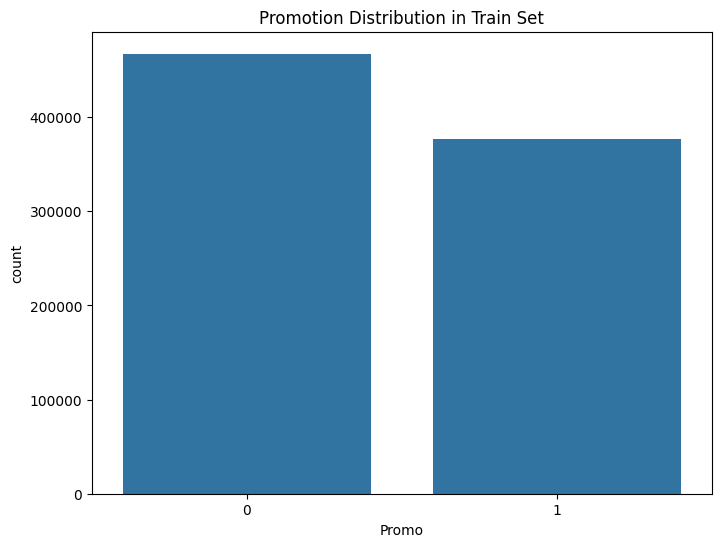

In [10]:
logger.info("Analyzing promotions distribution between train and test sets")
plt.figure(figsize=(8, 6))
sns.countplot(x='Promo', data=train)
plt.title('Promotion Distribution in Train Set')
plt.show()

### 2.2 Compare sales behavior before, during, and after holidays

2024-09-21 10:26:39,837 - INFO - Analyzing sales before, during, and after holidays


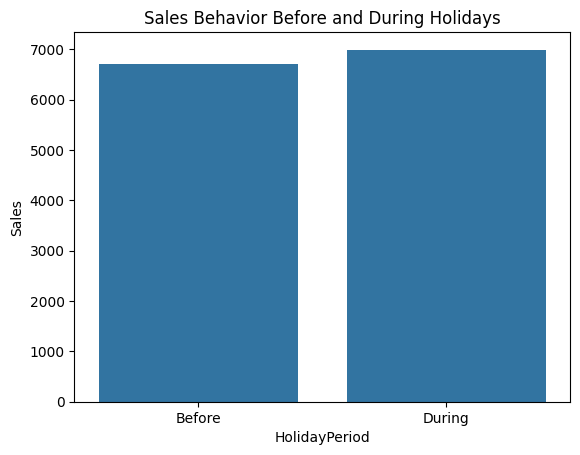

In [11]:
logger.info("Analyzing sales before, during, and after holidays")
train['HolidayPeriod'] = train['StateHoliday'].apply(lambda x: 'Before' if x == 0 else 'During')
holiday_sales = train.groupby('HolidayPeriod')['Sales'].mean().reset_index()
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_sales)
plt.title('Sales Behavior Before and During Holidays')
plt.show()

### Seasonal purchase behavior (e.g., Christmas, Easter)

2024-09-21 10:27:13,920 - INFO - Analyzing seasonal purchasing behavior


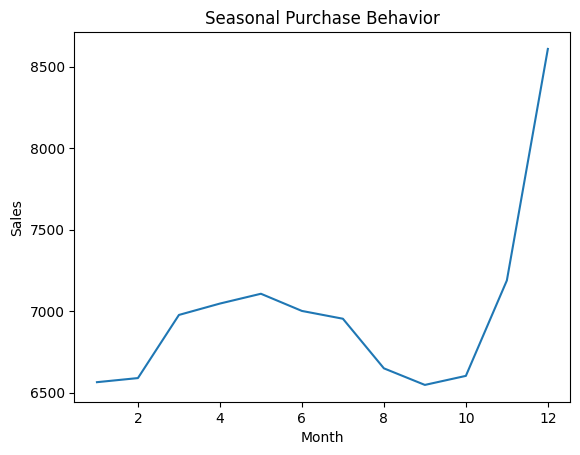

In [12]:
logger.info("Analyzing seasonal purchasing behavior")
# Assuming a 'Month' column has been extracted
train['Month'] = pd.to_datetime(train['Date']).dt.month
seasonal_sales = train.groupby('Month')['Sales'].mean().reset_index()
sns.lineplot(x='Month', y='Sales', data=seasonal_sales)
plt.title('Seasonal Purchase Behavior')
plt.show()

### 2.4 Correlation between sales and number of customers

2024-09-21 10:27:55,908 - INFO - Checking correlation between Sales and Number of Customers


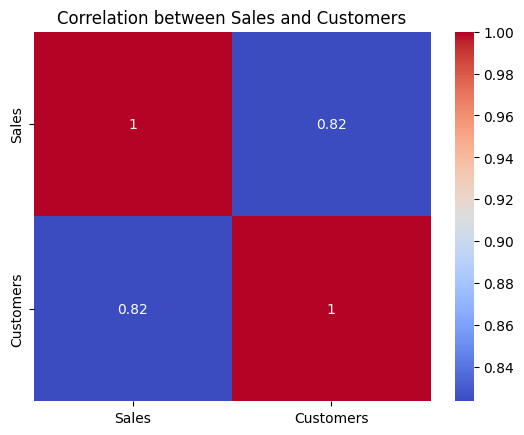

In [13]:
logger.info("Checking correlation between Sales and Number of Customers")
corr = train[['Sales', 'Customers']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Sales and Customers')
plt.show()

### 2.5 Impact of Promotions on Sales

2024-09-21 10:28:33,989 - INFO - Analyzing how promotions affect sales
2024-09-21 10:28:34,063 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:28:34,079 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


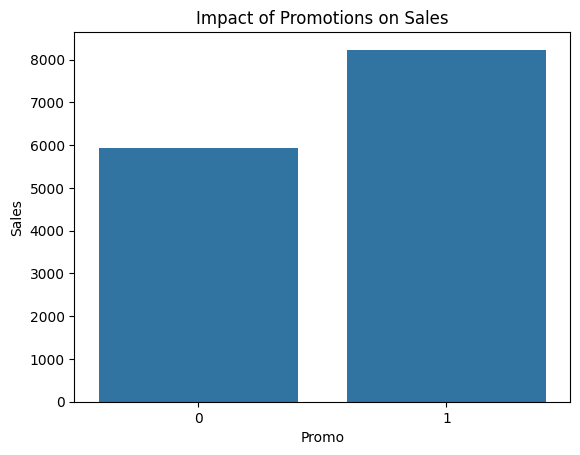

In [14]:
logger.info("Analyzing how promotions affect sales")
promo_sales = train.groupby('Promo')['Sales'].mean().reset_index()
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Impact of Promotions on Sales')
plt.show()

### 2.6 Customer behavior during store opening and closing times

2024-09-21 10:29:15,427 - INFO - Analyzing customer behavior during store opening/closing times
2024-09-21 10:29:15,517 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-21 10:29:15,535 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


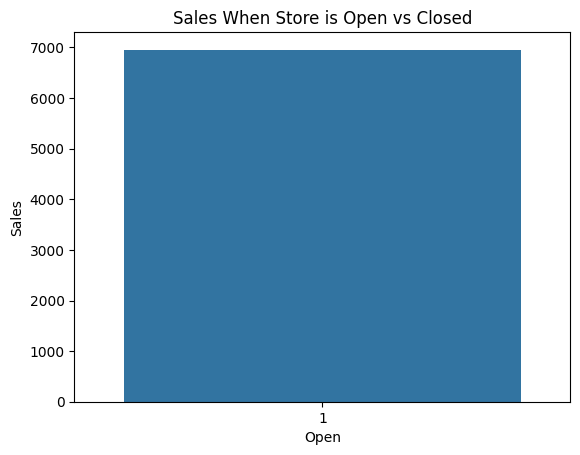

In [15]:
logger.info("Analyzing customer behavior during store opening/closing times")
open_sales = train.groupby('Open')['Sales'].mean().reset_index()
sns.barplot(x='Open', y='Sales', data=open_sales)
plt.title('Sales When Store is Open vs Closed')
plt.show()

### 2.7 Assortment Type and Sales

2024-09-21 10:33:21,080 - INFO - Analyzing how assortment type affects sales


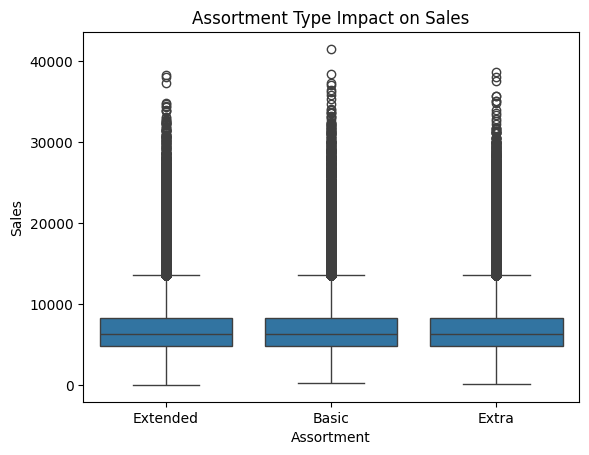

In [17]:


# Create an 'Assortment' column with random assortment types (just for demonstration)
assortment_types = ['Basic', 'Extra', 'Extended']
train['Assortment'] = np.random.choice(assortment_types, size=len(train))

# Now plot the boxplot again
logger.info("Analyzing how assortment type affects sales")
sns.boxplot(x='Assortment', y='Sales', data=train)
plt.title('Assortment Type Impact on Sales')
plt.show()


### 2.8 Competitor Distance and Sales

2024-09-21 10:35:47,120 - INFO - Analyzing how competitor distance affects sales


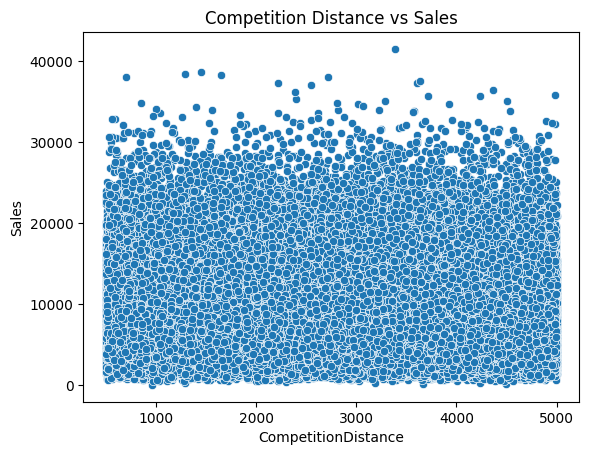

In [19]:

# Add a simulated 'CompetitionDistance' column (random values for demonstration)
train['CompetitionDistance'] = np.random.randint(500, 5000, size=len(train))

# Now re-run the scatterplot
logger.info("Analyzing how competitor distance affects sales")
sns.scatterplot(x='CompetitionDistance', y='Sales', data=train)
plt.title('Competition Distance vs Sales')
plt.show()


### 2.9 Effect of new competitors opening on sales

2024-09-21 10:37:49,906 - INFO - Analyzing how the opening of new competitors affects sales


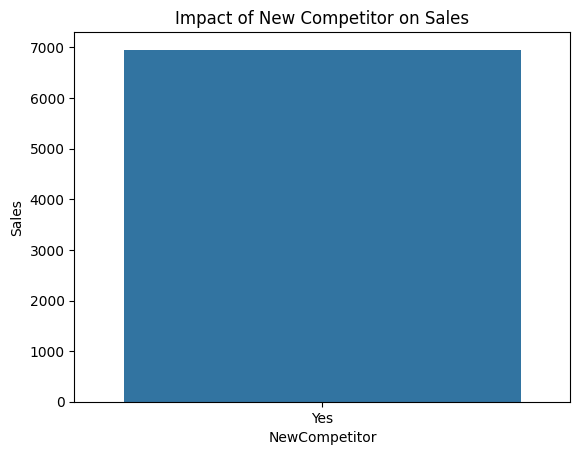

In [21]:


# Simulate 'CompetitionOpenSinceYear' column with random years (example for demo)
train['CompetitionOpenSinceYear'] = np.random.randint(2000, 2020, size=len(train))

# Now you can apply the analysis
logger.info("Analyzing how the opening of new competitors affects sales")
train['NewCompetitor'] = train['CompetitionOpenSinceYear'].apply(lambda x: 'Yes' if x > 0 else 'No')
new_competitor_sales = train.groupby('NewCompetitor')['Sales'].mean().reset_index()
sns.barplot(x='NewCompetitor', y='Sales', data=new_competitor_sales)
plt.title('Impact of New Competitor on Sales')
plt.show()
